## Lista X

Nome: Aimê G. da Nobrega
Nro USP: 11882429
Disciplina: Redes Complexas (SME0130)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
np.random.seed(50)

### 1 -Calcule a modularidade para a rede Jazz usando método fastgreedy.

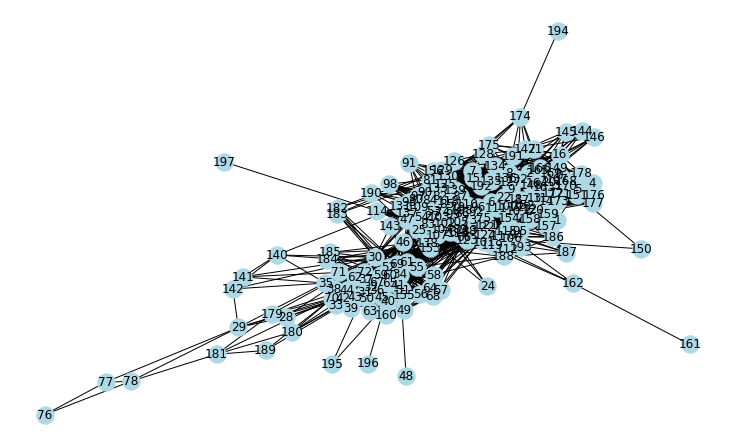

In [2]:
G= nx.read_edgelist("data/jazz.txt", nodetype=int)
# nodes_original = G.nodes
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

#G=nx.karate_club_graph() # we can also use the networkx dataset
pos=nx.spring_layout(G)
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show(True)

In [3]:
from networkx.algorithms.community import greedy_modularity_communities

##
# G=nx.karate_club_graph()
##
communities = list(greedy_modularity_communities(G))
for k in range(0,len(communities)):
    print('Community',k,':', sorted(communities[k]))

Community 0 : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 100, 111, 120, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 144, 145, 146, 147, 148, 149, 150, 151, 152, 157, 158, 159, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 191, 194]
Community 1 : [24, 25, 26, 27, 47, 53, 54, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 131, 133, 137, 139, 143, 154, 156, 161, 162, 190, 192, 193, 197]
Community 2 : [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 76, 77, 78, 138, 140, 141, 142, 153, 155, 160, 179, 180, 181, 182, 183, 184, 185, 189, 195, 196]
Community 3 : [186, 187, 188]


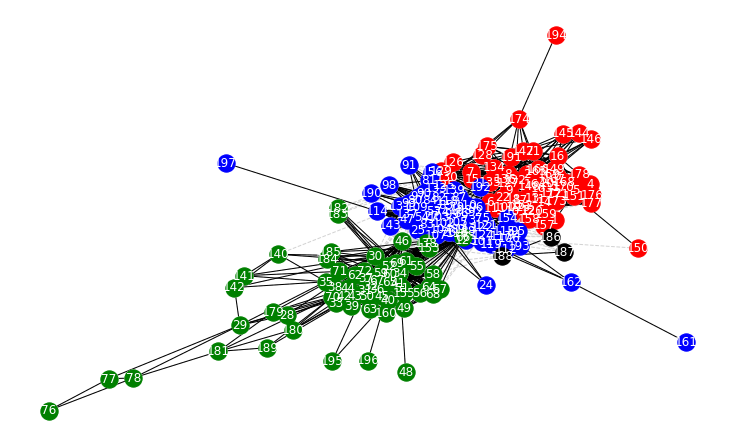

In [4]:
colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'white']

fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'white', edge_color='lightgray', style='dashed')
aux = 0
for cm in communities:
    nx.draw(G.subgraph(cm), pos=pos, node_color = colors[aux], 
                     with_labels = True, node_size=300, font_color = 'white')
    aux = aux + 1
plt.savefig('Jazz.eps') #save the figure into a file
plt.show(True)

In [6]:
from networkx.algorithms.community import greedy_modularity_communities

#G= nx.read_edgelist("data/zachary.txt", nodetype=int)
# G=nx.karate_club_graph()

c = list(greedy_modularity_communities(G))
communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])]=nc 
    nc = nc+1
#     print('Community:', sorted(c[k]))
# print(communities)

In [22]:
def modularity(G, c):
    A = nx.adjacency_matrix(G)
    N = len(G)
    M = G.number_of_edges()
    Q = 0
    for i in np.arange(0,N):
        ki = len(list(G.neighbors(i)))
        for j in np.arange(0,N):
            if(c[i]==c[j]):
                kj = len(list(G.neighbors(j)))
                Q = Q + A[i,j]-(ki*kj)/(2*M)
    Q = Q/(2*M)
    return Q

In [ ]:
print("Modularity Q = ", modularity(G,communities))

### 2 -Calcule a modularidade para a rede Jazz usando método Louvain.

In [4]:
import community as community_louvain
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx

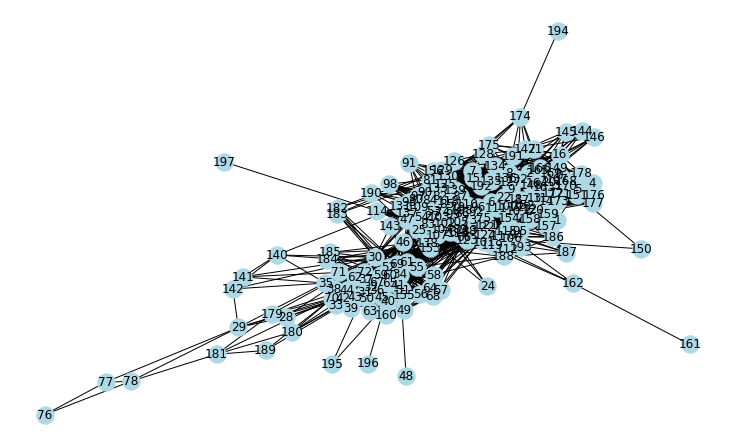

In [3]:
# G= nx.read_edgelist("data/jazz.txt", nodetype=int)
# # nodes_original = G.nodes
# G = G.to_undirected()
# G.remove_edges_from(nx.selfloop_edges(G))
# Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
# G = G.subgraph(Gcc[0])
# G = nx.convert_node_labels_to_integers(G, first_label=0)

# # G=nx.karate_club_graph() # we can also use the networkx dataset
# pos=nx.spring_layout(G)
# fig= plt.figure(figsize=(10,6))
# nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
# plt.show(True)

In [31]:
from community import community_louvain
partitions =community_louvain.best_partition(G)
partitions_list = np.array(list(partitions.values()))

print("Modularity Q = ", modularity(G,partitions_list))

Modularity Q =  0.44487909975820294


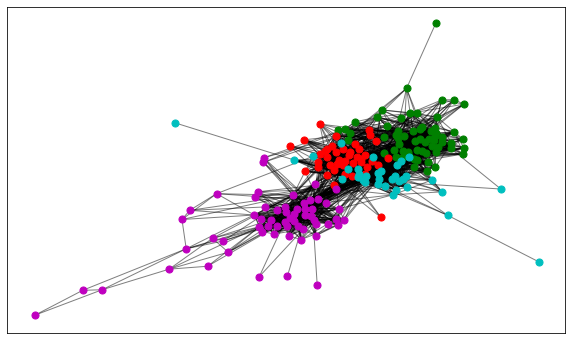

In [5]:
#drawing
fig= plt.figure(figsize=(10,6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partitions.values())))
count = 0
for com in set(partitions.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partitions.keys() if partitions[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

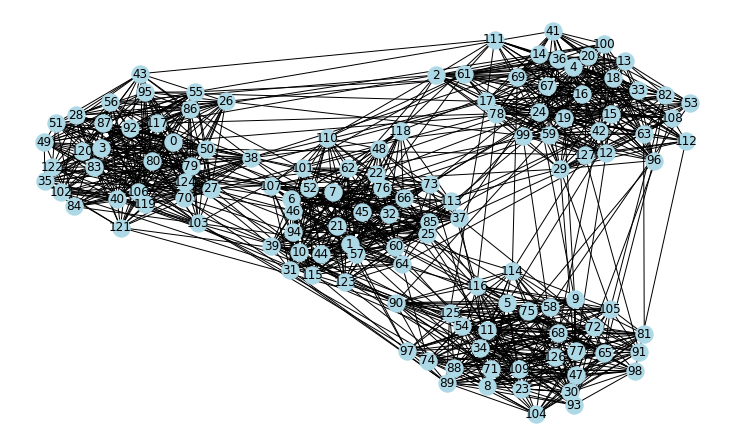

In [6]:
N = 128
tau1 = 3
tau2 = 1.5
mu = 0.04
k =16
minc = 32
maxc = 32
G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, 
                        max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show(True)

In [7]:
partition = community_louvain.best_partition(G)

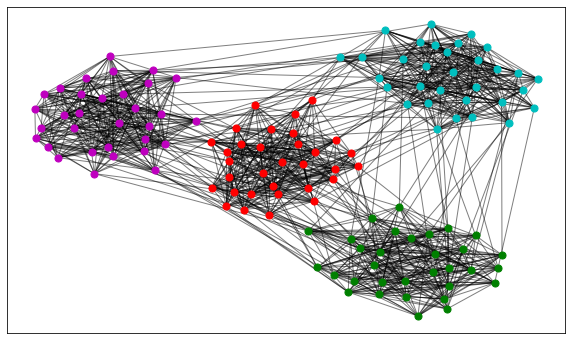

In [8]:
#drawing
fig= plt.figure(figsize=(10,6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [10]:
def modularity(G, c):
    A = nx.adjacency_matrix(G)
    N = len(G)
    M = G.number_of_edges()
    Q = 0
    for i in np.arange(0,N):
        ki = len(list(G.neighbors(i)))
        for j in np.arange(0,N):
            if(c[i]==c[j]):
                kj = len(list(G.neighbors(j)))
                Q = Q + A[i,j]-(ki*kj)/(2*M)
    Q = Q/(2*M)
    return Q

In [12]:
print("Modularity Q = ", modularity(G,partition)) ### errado

Modularity Q =  0.643639535397838


### 3 -Considere o método de geração de redes LFR_benchmark_graph. Obtenha os valores da modularidade para 𝜇= 0.05, 𝜇= 0.1 e 𝜇= 0.2. Use o algoritmo de Louvain.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

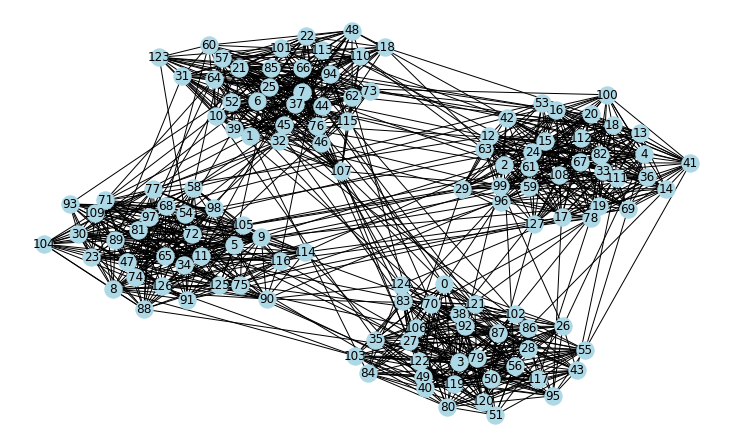

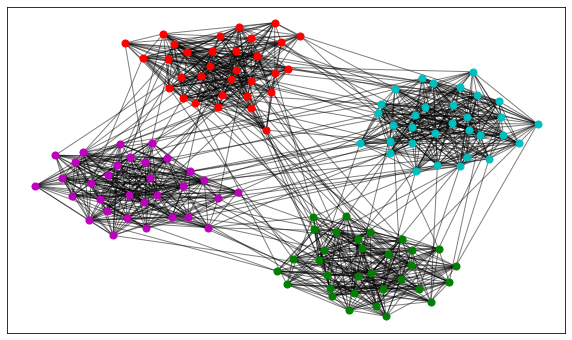

Modularity Q =  0.643639535397838


In [10]:
N = 128
tau1 = 3
tau2 = 1.5
k =16
minc = 32
maxc = 32
mu = 0.05

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show(True)

partition = community_louvain.best_partition(G)
#drawing
fig= plt.figure(figsize=(10,6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

print("Modularity Q = ", modularity(G,partition))

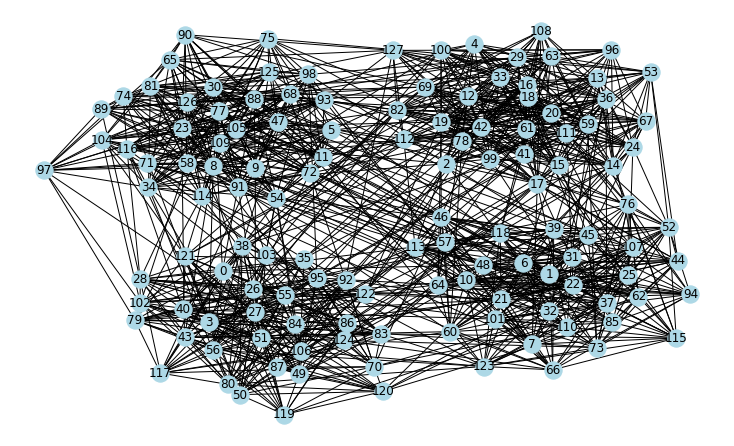

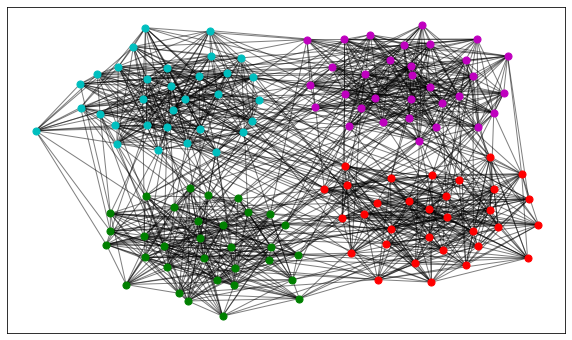

Modularity Q =  0.5427818606053953


In [11]:
mu = 0.1

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show(True)

partition = community_louvain.best_partition(G)
#drawing
fig= plt.figure(figsize=(10,6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

print("Modularity Q = ", modularity(G,partition))

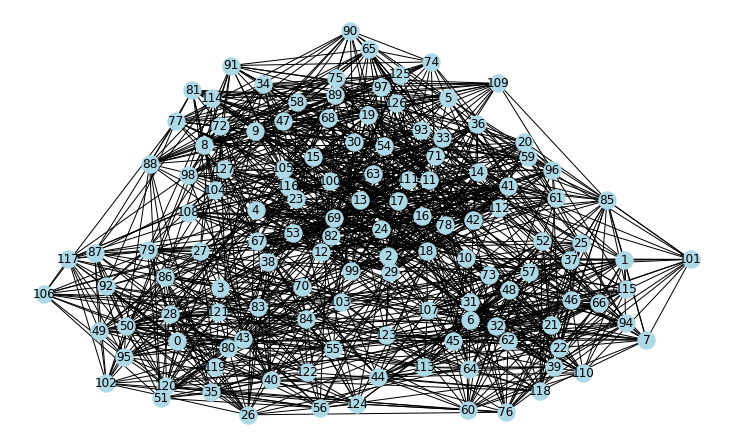

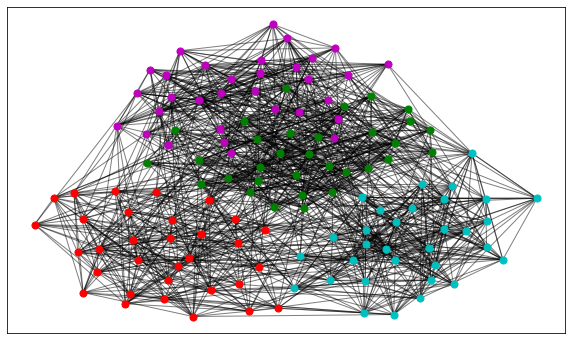

Modularity Q =  0.44487909975820294


In [12]:
mu = 0.2

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show(True)

partition = community_louvain.best_partition(G)
#drawing
fig= plt.figure(figsize=(10,6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

print("Modularity Q = ", modularity(G,partition))

### 4-Considere o método de geração de redes LFR_benchmark_graph. Obtenha os valores da modularidade para 𝜇= 0.05, 𝜇= 0.1 e 𝜇= 0.2. Use o algoritmo fastgreedy.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

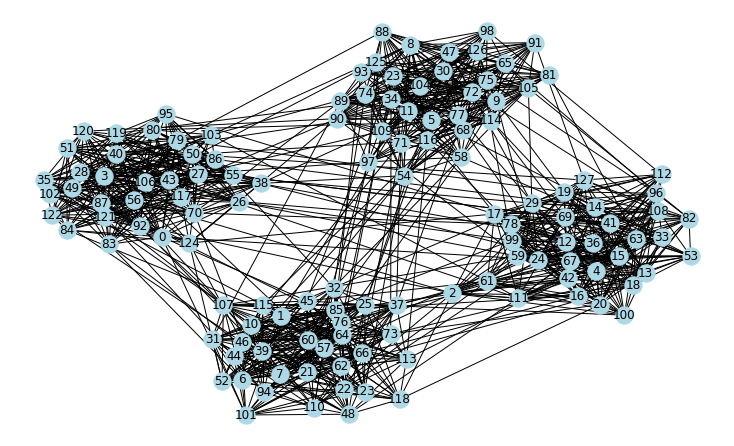

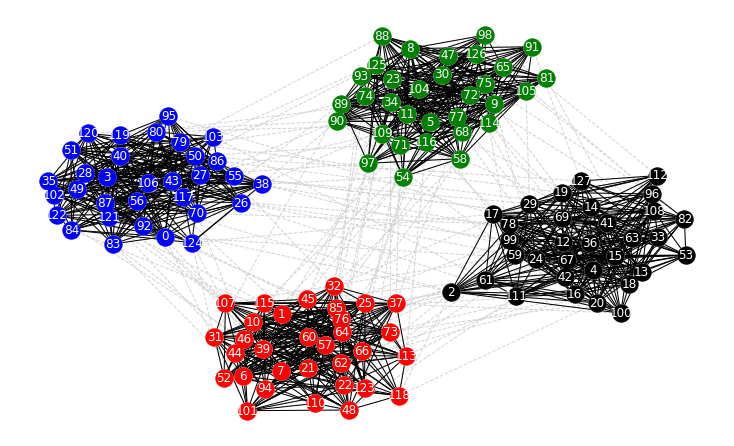

Modularity Q =  0.643639535397838


In [23]:
N = 128
tau1 = 3
tau2 = 1.5
k =16
minc = 32
maxc = 32
mu = 0.05

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show(True)

from networkx.algorithms.community import greedy_modularity_communities

##
# G=nx.karate_club_graph()
##
communities = list(greedy_modularity_communities(G))
# for k in range(0,len(communities)):
#     print('Community',k,':', sorted(communities[k]))

colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'white']

fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'white', edge_color='lightgray', style='dashed')
aux = 0
for cm in communities:
    nx.draw(G.subgraph(cm), pos=pos, node_color = colors[aux], 
                     with_labels = True, node_size=300, font_color = 'white')
    aux = aux + 1
plt.savefig('Jazz.eps') #save the figure into a file
plt.show(True)


from networkx.algorithms.community import greedy_modularity_communities

#G= nx.read_edgelist("data/zachary.txt", nodetype=int)
# G=nx.karate_club_graph()

c = list(greedy_modularity_communities(G))
communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])]=nc 
    nc = nc+1
#     print('Community:', sorted(c[k]))
# print(communities)

print("Modularity Q = ", modularity(G,communities))

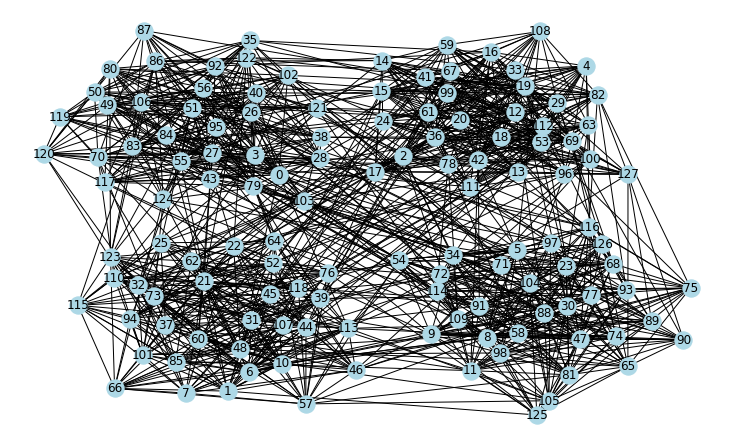

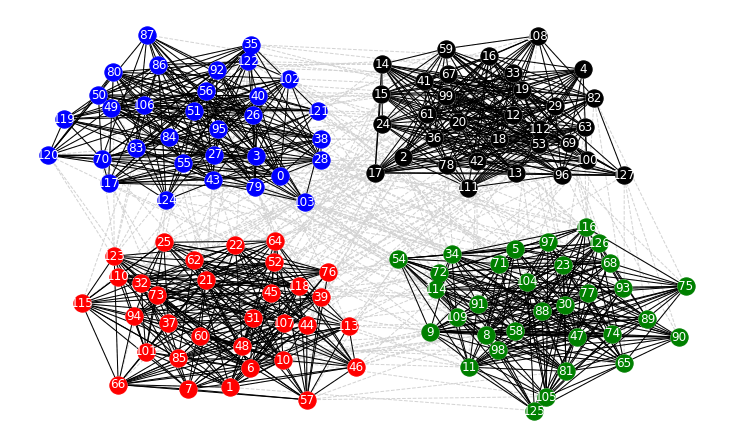

Modularity Q =  0.5427818606053953


In [27]:
N = 128
tau1 = 3
tau2 = 1.5
k =16
minc = 32
maxc = 32
mu = 0.1

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show(True)

from networkx.algorithms.community import greedy_modularity_communities

##
# G=nx.karate_club_graph()
##
communities = list(greedy_modularity_communities(G))
# for k in range(0,len(communities)):
#     print('Community',k,':', sorted(communities[k]))

colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'white']

fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'white', edge_color='lightgray', style='dashed')
aux = 0
for cm in communities:
    nx.draw(G.subgraph(cm), pos=pos, node_color = colors[aux], 
                     with_labels = True, node_size=300, font_color = 'white')
    aux = aux + 1
plt.savefig('Jazz.eps') #save the figure into a file
plt.show(True)


from networkx.algorithms.community import greedy_modularity_communities

#G= nx.read_edgelist("data/zachary.txt", nodetype=int)
# G=nx.karate_club_graph()

c = list(greedy_modularity_communities(G))
communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])]=nc 
    nc = nc+1
#     print('Community:', sorted(c[k]))
# print(communities)

print("Modularity Q = ", modularity(G,communities))

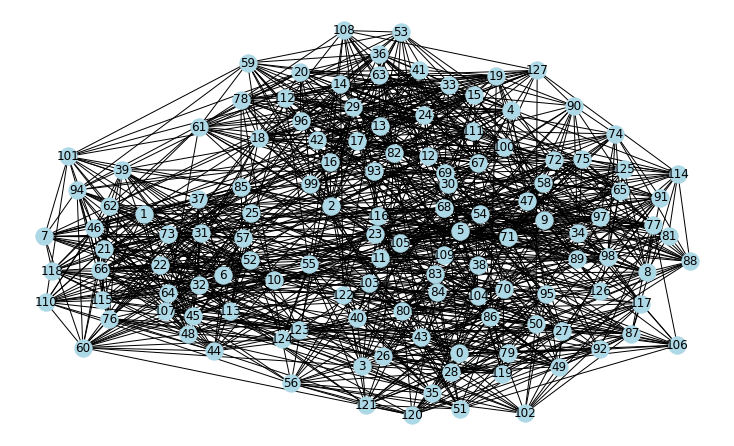

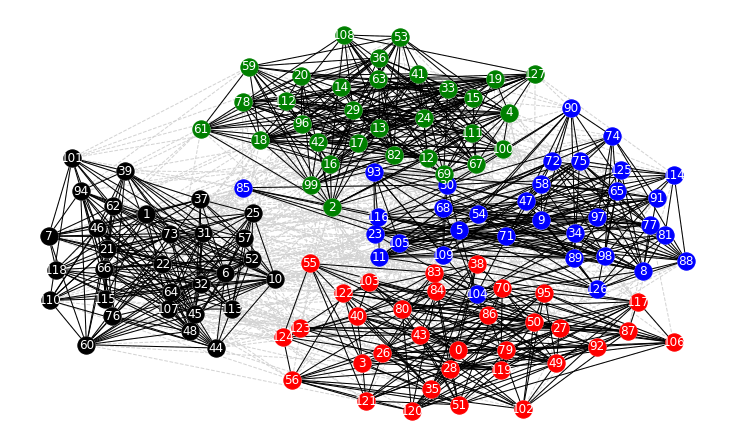

Modularity Q =  0.4349088598177227


In [28]:
N = 128
tau1 = 3
tau2 = 1.5
k =16
minc = 32
maxc = 32
mu = 0.2

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show(True)

from networkx.algorithms.community import greedy_modularity_communities

##
# G=nx.karate_club_graph()
##
communities = list(greedy_modularity_communities(G))
# for k in range(0,len(communities)):
#     print('Community',k,':', sorted(communities[k]))

colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'white']

fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'white', edge_color='lightgray', style='dashed')
aux = 0
for cm in communities:
    nx.draw(G.subgraph(cm), pos=pos, node_color = colors[aux], 
                     with_labels = True, node_size=300, font_color = 'white')
    aux = aux + 1
plt.savefig('Jazz.eps') #save the figure into a file
plt.show(True)


from networkx.algorithms.community import greedy_modularity_communities

#G= nx.read_edgelist("data/zachary.txt", nodetype=int)
# G=nx.karate_club_graph()

c = list(greedy_modularity_communities(G))
communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])]=nc 
    nc = nc+1
#     print('Community:', sorted(c[k]))
# print(communities)

print("Modularity Q = ", modularity(G,communities))